In [32]:
dati = [
    (77, 170),
    (155, 166),
    (180, 178),
    (102, 150),
    (73, 153),
    (42, 121),
    (145, 181),
    (170, 170),
    (102, 165),
    (73., 161),
    (71, 148),
    (59, 135),
    (40, 118),
    (61, 125),
    (61, 120),
    (94, 171),
    (148, 185),
    (90, 160),
    (141,169),
    (100, 179),
    (51, 122)
]

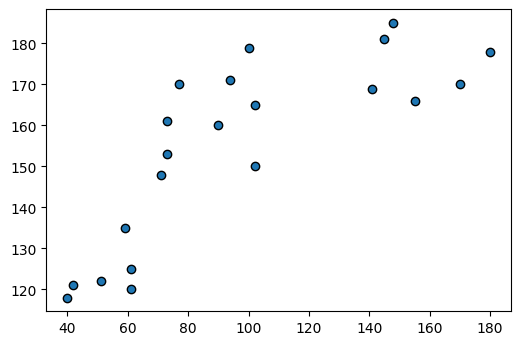

In [33]:
from matplotlib import pyplot as plt
x = [di[0] for di in dati]
y = [di[1] for di in dati]
plt.figure(dpi= 100)
plt.scatter(x, y, linewidths=1, edgecolors='black')
plt.show()

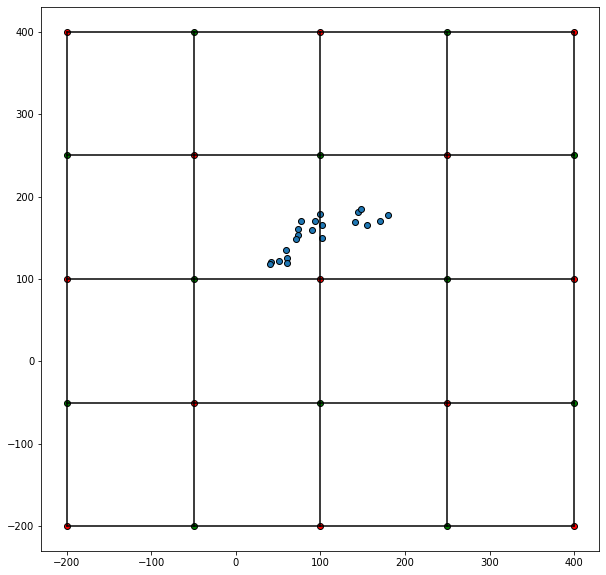

In [57]:
apmPar = 0.1
#neironi = [
#    [[40,150],[120,150],[200,150]]   
#]
#ncolor = [
#    ['green', 'yellow', 'red']
#]

minX = -50
maxX = 301
minY = 25
maxY = 301
step = 20
neironi =[[ [x, y] for x in range(minX,maxX,step) ] for y in range (minY, maxY, step)]
# ○-○ Pieņemsim, ka starp neironiem ir saites ar kaimiņiem vertikāli un horizontāli
# | |
# ○-○
ncolor = [[( "red" if (x + y) % 2 == 0 else "green") for x in range(len(neironi[y])) ] for y in range (len(neironi))]


plt.figure(figsize=(10,10))
plt.scatter(x, y, linewidths=1, edgecolors='black')
for ni in range(len(neironi)):
    for nj in range(len(neironi[ni])):
        if (ni + 1 < len(neironi)):
            plt.plot([neironi[ni][nj][0],neironi[ni + 1][nj][0]],[neironi[ni][nj][1],neironi[ni + 1][nj][1]], c='black')
        if (nj + 1 < len(neironi[ni])):
            plt.plot([neironi[ni][nj][0],neironi[ni][nj + 1][0]],[neironi[ni][nj][1],neironi[ni][nj+1][1]], c='black')
            
for ni in range(len(neironi)):
    for nj in range(len(neironi[ni])):
        plt.scatter(neironi[ni][nj][0], neironi[ni][nj][1], c=ncolor[ni][nj], linewidths=1, edgecolors='black')
plt.show()


In [58]:
import random
import math

randDati = dati.copy()
rdi = len(randDati)

def gadijumaPunkts():
    global randDati
    global rdi
    if rdi == len(randDati):
        rdi = 0
        for i in range(len(randDati)):
            ri = random.randint(0, len(dati)-1)
            t = randDati[ri]
            randDati[ri] = randDati[i]
            randDati[i] = t
    
    p = randDati[rdi]
    rdi = rdi+1
    return p

def apmaciba():
    global neironi
    punkts = gadijumaPunkts()
    bestD = float('inf')
    bestI = 0
    bestJ = 0
    bestN = None
    for ni in range(len(neironi)):
        for nj in range(len(neironi[ni])):
            neirons = neironi[ni][nj]
            d = math.sqrt((punkts[0]-neirons[0])**2 + (punkts[1]-neirons[1])**2)
            if d < bestD:
                bestD = d
                bestI = ni
                bestJ = nj
                bestN = neirons
    #print(str(punkts)+" "+str(bestI)+":"+str(bestJ)+ " d="+str(bestD)+" N:"+str(neironi[bestI][bestJ]) )
    
    bestN[0] = bestN[0] + apmPar*(punkts[0]-bestN[0])
    bestN[1] = bestN[1] + apmPar*(punkts[1]-bestN[1])
    
    for di in range(-1,2):
        for dj in range(-1,2):
            if di==0 and dj==0:
                continue
            i = bestI + di
            j = bestJ + dj
            if i<0 or j<0 or i>=len(neironi) or j>=len(neironi[i]):
                continue
            neirons = neironi[i][j]
            nt = apmPar * ( 0.125 ** (abs(di)+abs(dj)) )
            #print(nt)
            neirons[0] = neirons[0] + nt*(punkts[0]-neirons[0])
            neirons[1] = neirons[1] + nt*(punkts[1]-neirons[1])
    

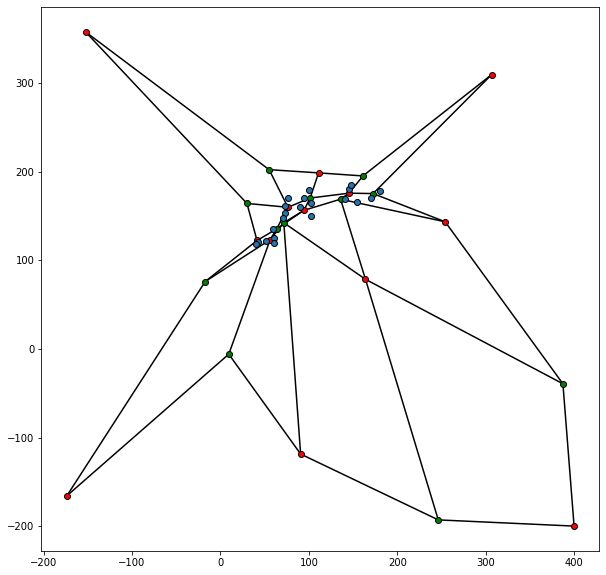

In [59]:
for ai in range(1000):
    apmaciba()

plt.figure(figsize=(10,10))
plt.scatter(x, y, linewidths=1, edgecolors='black', zorder=10)
for ni in range(len(neironi)):
    for nj in range(len(neironi[ni])):
        if (ni + 1 < len(neironi)):
            plt.plot([neironi[ni][nj][0],neironi[ni + 1][nj][0]],[neironi[ni][nj][1],neironi[ni + 1][nj][1]], c='black')
        if (nj + 1 < len(neironi[ni])):
            plt.plot([neironi[ni][nj][0],neironi[ni][nj + 1][0]],[neironi[ni][nj][1],neironi[ni][nj+1][1]], c='black')

        
for ni in range(len(neironi)):
    for nj in range(len(neironi[ni])):
        plt.scatter(neironi[ni][nj][0], neironi[ni][nj][1], c=ncolor[ni][nj], linewidths=1, edgecolors='black', zorder=9)
plt.show()